# Dmitry Kostyukov

## Research question/interests

How effective are common indicators such as RSI at predicting future price trends of stocks? Are they more effective with stocks or ETFs? Are they more effective at predicting up-trends or down-trends? Are they more effective with high volume stocks or low volume stocks?

In [2]:
import pandas as pd
amzn = pd.read_csv("../data/raw/archive/Stocks/amzn.us.txt", sep=",", header=None, names=["Date", "Open", "High", "Low", "Close", "Volume", "OpenInt"])
amzn

,Date,Open,High,Low,Close,Volume,OpenInt
0,Date,Open,High,Low,Close,Volume,OpenInt
1,1997-05-16,1.97,1.98,1.71,1.73,14700000,0
2,1997-05-19,1.76,1.77,1.62,1.71,6106800,0
3,1997-05-20,1.73,1.75,1.64,1.64,5467200,0
4,1997-05-21,1.64,1.65,1.38,1.43,18853200,0
...,...,...,...,...,...,...,...
5149,2017-11-06,1109.15,1125.41,1108.77,1120.66,3331738,0
5150,2017-11-07,1124.74,1130.6,1117.5,1123.17,2684443,0
5151,2017-11-08,1122.82,1135.54,1119.11,1132.88,2576010,0
5152,2017-11-09,1125.96,1129.62,1115.77,1129.13,3729978,0


# Task 1: Exploratory Data Analysis



In [41]:
#Importing libraries that will be needed for EDA
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns #Understanding my variables

Importing in four stocks and two ETFs, and doing some basic analysis:

In [4]:
amzn = pd.read_csv("../data/raw/archive/Stocks/amzn.us.txt", sep=",", header=0)
nvda = pd.read_csv("../data/raw/archive/Stocks/nvda.us.txt", sep=",", header=0)
msft = pd.read_csv("../data/raw/archive/Stocks/msft.us.txt", sep=",", header=0)
v = pd.read_csv("../data/raw/archive/Stocks/v.us.txt", sep=",", header=0)
goog = pd.read_csv("../data/raw/archive/Stocks/goog.us.txt", sep=",", header=0)
spy = pd.read_csv("../data/raw/archive/ETFs/spy.us.txt", sep=",", header=0)
dia = pd.read_csv("../data/raw/archive/ETFs/dia.us.txt", sep=",", header=0)
dia.shape
dia.columns
dia.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,92.177,93.031,92.075,92.977,5803401,0
1,2005-02-28,92.763,93.515,92.037,92.414,8688535,0
2,2005-03-01,92.474,93.085,92.474,92.867,6192040,0
3,2005-03-02,92.511,93.266,92.456,92.728,8885876,0
4,2005-03-03,93.031,93.247,92.355,92.885,9628615,0


In [5]:
amzn

,Date,Open,High,Low,Close,Volume,OpenInt
0,1997-05-16,1.97,1.98,1.71,1.73,14700000,0
1,1997-05-19,1.76,1.77,1.62,1.71,6106800,0
2,1997-05-20,1.73,1.75,1.64,1.64,5467200,0
3,1997-05-21,1.64,1.65,1.38,1.43,18853200,0
4,1997-05-22,1.44,1.45,1.31,1.40,11776800,0
...,...,...,...,...,...,...,...
5148,2017-11-06,1109.15,1125.41,1108.77,1120.66,3331738,0
5149,2017-11-07,1124.74,1130.60,1117.50,1123.17,2684443,0
5150,2017-11-08,1122.82,1135.54,1119.11,1132.88,2576010,0
5151,2017-11-09,1125.96,1129.62,1115.77,1129.13,3729978,0


Lets analyze some basic statistics about the Amazon stock using .describe().

In [6]:
amzn.describe()

,Open,High,Low,Close,Volume,OpenInt
count,5153.000000,5153.000000,5153.000000,5153.000000,5.153000e+03,5153.0
mean,181.747357,183.880652,179.466684,181.769343,7.837325e+06,0.0
std,239.611052,241.226109,237.638139,239.548391,7.594745e+06,0.0
min,1.410000,1.450000,1.310000,1.400000,0.000000e+00,0.0
25%,35.500000,36.130000,35.000000,35.550000,3.779449e+06,0.0
50%,70.900000,72.750000,69.020000,70.700000,5.902992e+06,0.0
75%,242.850000,245.770000,240.670000,243.880000,8.888949e+06,0.0
max,1126.100000,1135.540000,1124.060000,1132.880000,1.043288e+08,0.0


The count seems useless as it simply tells us the amount of rows in the data set and is the same value for all columns.

The mean close price is slightly higher than the mean open price. This makes sense as AMZN has risen in price from 1997 to 2017 and the difference of the two numbers would tell us the average daily change in price over the 20 year period.

I also noticed that the minimum volume is 0, which is most likely wrong as a trading day with 0 volume is unheard of for a well known stock such as AMZN.

In [7]:
amzn_cleaned = amzn[amzn['Volume'].between(1, 1.043288e+08)]
amzn_cleaned.describe()

,Open,High,Low,Close,Volume,OpenInt
count,5152.000000,5152.000000,5152.000000,5152.000000,5.152000e+03,5152.0
mean,181.754839,183.887671,179.473779,181.776070,7.838846e+06,0.0
std,239.633708,241.248997,237.660659,239.571155,7.594697e+06,0.0
min,1.410000,1.450000,1.310000,1.400000,4.872000e+05,0.0
25%,35.497500,36.127500,35.000000,35.550000,3.779787e+06,0.0
50%,70.900000,72.750000,68.980000,70.695000,5.906996e+06,0.0
75%,242.942500,246.005000,240.842500,243.890000,8.891018e+06,0.0
max,1126.100000,1135.540000,1124.060000,1132.880000,1.043288e+08,0.0


Now let's add some commonly used indicators to our dataset. The first indicator I will add is the RSI indicators, the RSI indicates whether a stock is overbought or oversold, when the RSI value is above 70, the stock can be considered overbought, when the RSI is below 30, it can be considered oversold. A common belief is that you should buy a stock when the RSI is below 30 and sell a stock when the RSI is above 70, assuming all other factors are taken into account.

In [8]:
spy_cleaned = spy.drop(['OpenInt'], axis=1) #Dropping OpenInt as it provides no usefull data.
spy_cleaned = spy_cleaned[spy_cleaned['Volume'].between(1, 1.043288e+09)]
spy_cleaned['Date'] = pd.to_datetime(spy_cleaned['Date']) #Changing the data from object type to DateTime type.
spy_cleaned.index = spy_cleaned.Date

spy_rsi = spy_cleaned
delta = spy_rsi['Close'].diff()
up = delta.clip(lower=0)
down = -1*delta.clip(upper=0)

ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()

rs = ema_up/ema_down

spy_rsi['RSI'] = 100 - (100/(1+rs))
spy_rsi

,Date,Open,High,Low,Close,Volume,RSI
Date,,,,,,,
2005-02-25,2005-02-25,104.77,106.00,104.68,105.79,70221808,NaN
2005-02-28,2005-02-28,105.55,105.68,104.56,105.08,79695344,0.000000
2005-03-01,2005-03-01,105.22,105.87,105.22,105.62,54607412,5.527124
2005-03-02,2005-03-02,105.21,106.22,105.10,105.57,73733090,5.496829
2005-03-03,2005-03-03,105.99,106.20,105.15,105.61,71286823,5.940998
...,...,...,...,...,...,...,...
2017-11-06,2017-11-06,258.30,259.00,258.22,258.85,49529148,71.990742
2017-11-07,2017-11-07,258.97,259.35,258.11,258.67,57218448,70.445171
2017-11-08,2017-11-08,258.47,259.22,258.15,259.11,50277699,72.026161


Here we have our spy dataset with the RSI indicator, as you can see the first few rows have a value of zero for the RSI. This is because the RSI that I used needs atleast 14 data entries to calculate, therefore the first 14 rows are zero.

Now I will calculate the MACD using the msft dataset. The MACD is another common indicator used to predict changes in a stock's price. The MACD is usually paired with another indicator called a 'signal line'. When the MACD crosses over the signal line, that is commonly interpreted as a buy signal, and when the MACD crosses below the signal line, it is interpreted as a sell signal.

In [9]:
msft_cleaned = msft.drop(['OpenInt'], axis=1) #Dropping OpenInt as it provides no usefull data.
msft_cleaned = msft_cleaned[msft_cleaned['Volume'].between(1, 1.043288e+09)]
msft_cleaned['Date'] = pd.to_datetime(msft_cleaned['Date']) #Changing the data from object type to DateTime type.
msft_cleaned.index = msft_cleaned.Date
msft_cleaned

msft_MACD = msft_cleaned
exp1 = msft_MACD['Close'].ewm(span=12, adjust=False).mean()
exp2 = msft_MACD['Close'].ewm(span=26, adjust=False).mean()
msft_MACD['MACD'] = exp1 - exp2
msft_MACD['Signal line'] = msft_MACD['MACD'].ewm(span=9, adjust=False).mean()
msft_MACD

,Date,Open,High,Low,Close,Volume,MACD,Signal line
Date,,,,,,,,
1986-03-14,1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0.000000,0.000000
1986-03-17,1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0.000000,0.000000
1986-03-18,1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0.000000,0.000000
1986-03-19,1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0.000000,0.000000
1986-03-20,1986-03-20,0.07533,0.07533,0.06720,0.07533,77665088,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2017-11-06,2017-11-06,84.20000,84.70000,84.08250,84.47000,19852151,2.335560,1.907845
2017-11-07,2017-11-07,84.77000,84.90000,83.93000,84.26000,17927878,2.339055,1.994087
2017-11-08,2017-11-08,84.14000,84.61000,83.83000,84.56000,18029584,2.339069,2.063083


Once again, the first few rows of the MACD and Signal line columns are zero, this is because MACD needs a minimum of 26 rows of data to calculate.

# Visualizations:
Next, I will analyze some visualizations of the data sets.

<AxesSubplot:>

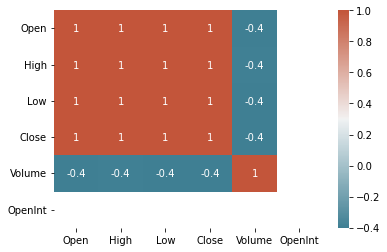

In [10]:
#Heatmap for the V (VISA) dataset
corr = v.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:xlabel='Open', ylabel='Volume'>

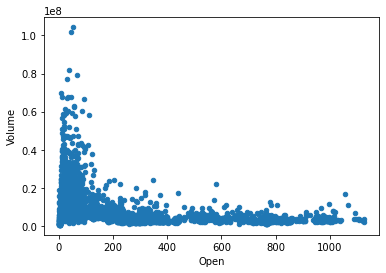

In [11]:
amzn_cleaned.plot(kind='scatter', x='Open', y='Volume')

From this scatter plot we can see that the max volume that we saw before using .describe() is an outlier, and that most trading days have much less volume. We can also see that the 0 to 200 range has the highest volume days, especially as the open price gets closer to around 50. This perfectly correlates with the dot-com bubble, which was a period of time in the late 90s/ early 2000s during which the Amazon stock surged in popularity.

<AxesSubplot:ylabel='Frequency'>

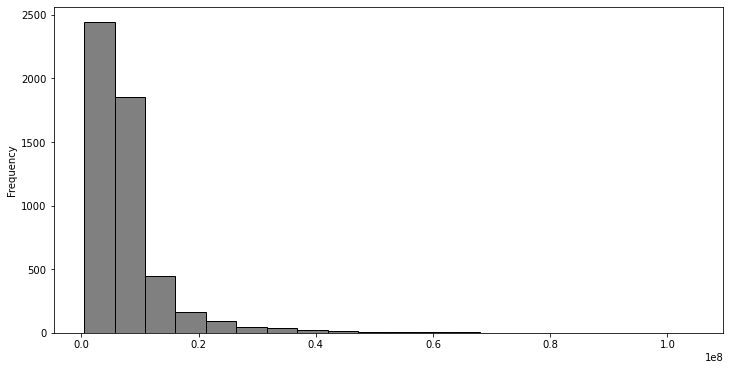

In [12]:
amzn_cleaned['Volume'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

From this histogram we can see that the most common volume is between 0.0(1.043288e+08) and 0.2(1.043288e+08).

Now let's take a look at the RSI for the spy dataset.

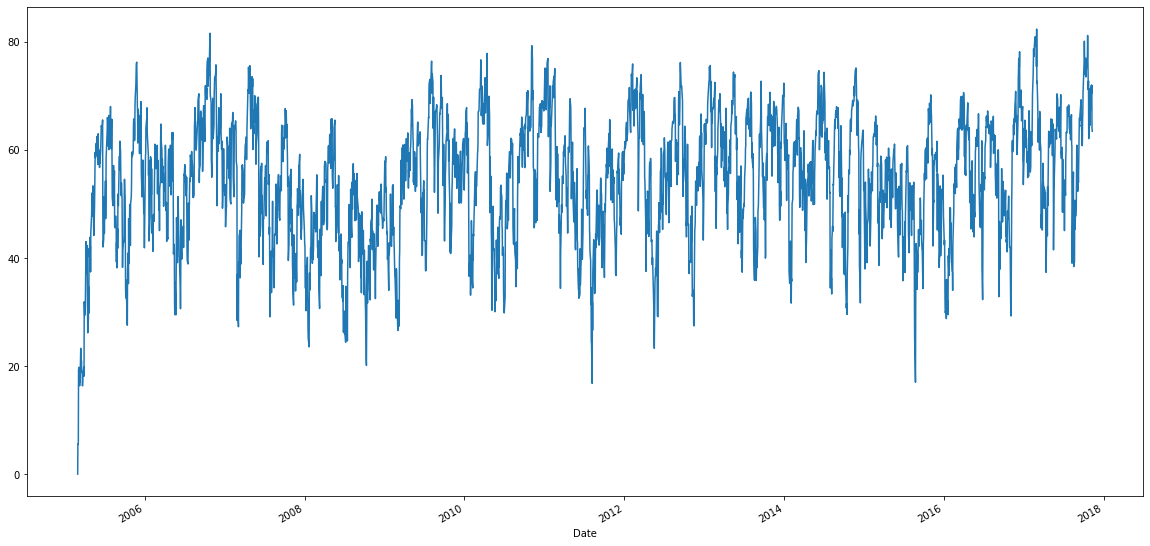

In [13]:
spy_rsi['RSI'].plot(figsize = (20,10))
plt.show()

This plot looks very crowded and you cant get much info from it. Lets zoom in on an area of interest- the 2007-08 Financial Crisis, and add the stocks close price to the plot.

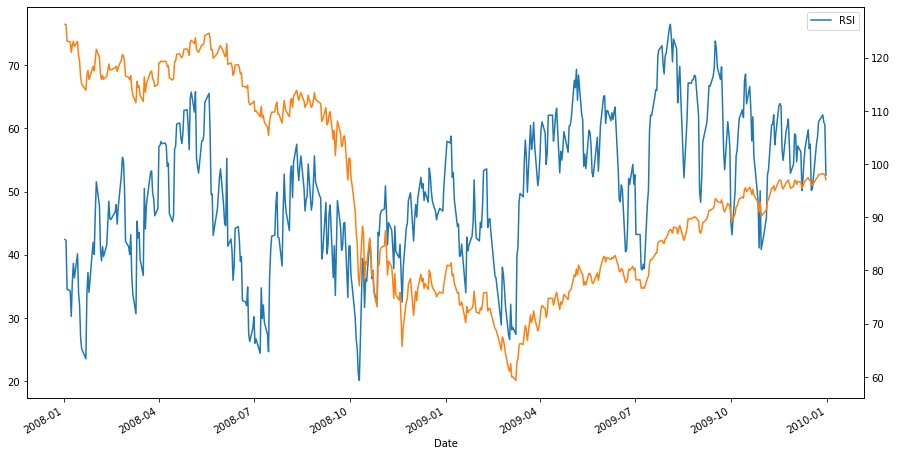

In [14]:
spy_rsi[['RSI']].loc['2008-01-01':'2010-01-01'].plot(figsize = (15,8))
spy_rsi['Close'].loc['2008-01-01':'2010-01-01'].plot(figsize = (15,8), secondary_y=True)
plt.show()

Here we see a plot of SPY's RSI and close price from 2008 to 2010. As we can see, SPY was on a steady decline from 2008-01-01 until about 2008-10 where the stock price takes a massive dive. The RSI reacts accordingly and we see an RSI value of about 21 on this day, signalling that the majority of people were selling. 

To analyze my question about the effectiveness of the RSI at predicting future price trends, I took notice of three points on the above plot: the RSI trough around 2008-07, the lowest point around 2008-10 and the trough around 2009-04. All three of these points can be thought of as potential buy signals, as they are all below 30. 

The first 

Now lets take a look at the MACD for MSFT.

<AxesSubplot:xlabel='Date'>

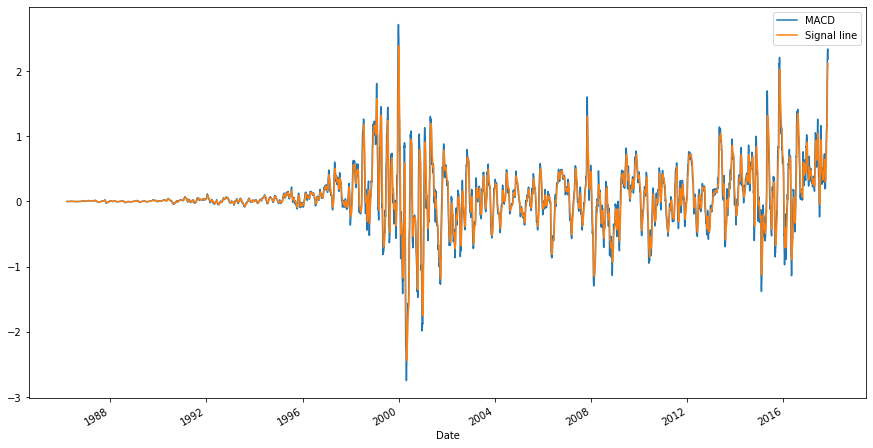

In [15]:
msft_MACD[['MACD','Signal line']].plot(figsize = (15,8))

<AxesSubplot:>

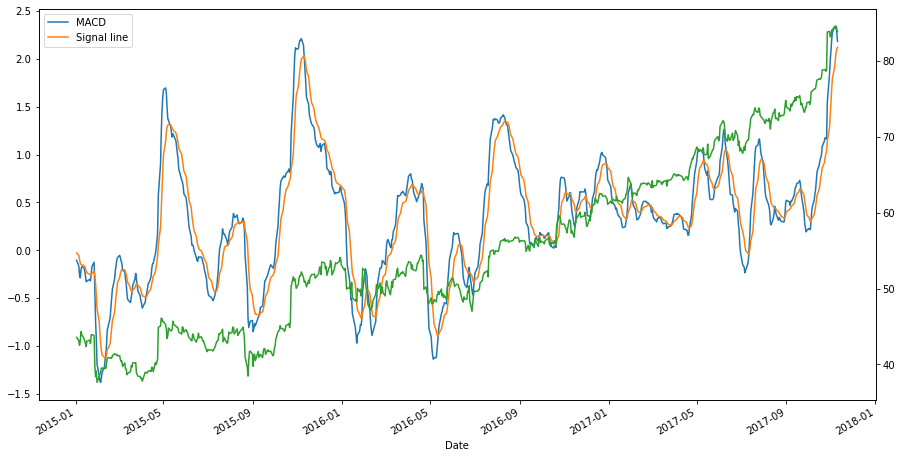

In [16]:
msft_MACD[['MACD','Signal line']].loc['2015-01-01':].plot(figsize = (15,8))
msft_MACD['Close'].loc['2015-01-01':].plot(figsize = (15,8), secondary_y=True)

# Task 2: Analysis Pipeline

### Step 1: Load Data

In [17]:
amzn = pd.read_csv("../data/raw/archive/Stocks/amzn.us.txt", sep=",", header=0)
amzn.dtypes

Date        object
Open       float64
High       float64
Low        float64
Close      float64
Volume       int64
OpenInt      int64
dtype: object

### Step 2: Clean Data

In [18]:
amzn_cleaned = amzn[amzn['Volume'].between(1, 1.043288e+08)] #Removing outliers/ incorrect entries.
amzn_cleaned = amzn_cleaned.drop(['OpenInt'], axis=1) #Dropping OpenInt as it provides no usefull data.
amzn_cleaned['Date'] = pd.to_datetime(amzn_cleaned['Date']) #Changing the data from object type to DateTime type.
amzn_cleaned.index = amzn_cleaned.Date
del amzn_cleaned['Date']
amzn_cleaned

,Open,High,Low,Close,Volume
Date,,,,,
1997-05-16,1.97,1.98,1.71,1.73,14700000
1997-05-19,1.76,1.77,1.62,1.71,6106800
1997-05-20,1.73,1.75,1.64,1.64,5467200
1997-05-21,1.64,1.65,1.38,1.43,18853200
1997-05-22,1.44,1.45,1.31,1.40,11776800
...,...,...,...,...,...
2017-11-06,1109.15,1125.41,1108.77,1120.66,3331738
2017-11-07,1124.74,1130.60,1117.50,1123.17,2684443
2017-11-08,1122.82,1135.54,1119.11,1132.88,2576010


### Step 3: Process Data

In [40]:
amzn_processed = amzn_cleaned

delta = amzn_processed['Close'].diff()
up = delta.clip(lower=0)
down = -1*delta.clip(upper=0)

ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()

rs = ema_up/ema_down

amzn_processed['RSI'] = 100 - (100/(1+rs))

exp1 = amzn_processed['Close'].ewm(span=12, adjust=False).mean()
exp2 = amzn_processed['Close'].ewm(span=26, adjust=False).mean()
amzn_processed['MACD'] = exp1 - exp2
amzn_processed['Signal line'] = amzn_processed['MACD'].ewm(span=9, adjust=False).mean()
amzn_processed

,Open,High,Low,Close,Volume,RSI,MACD,Signal line
Date,,,,,,,,
1997-05-16,1.97,1.98,1.71,1.73,14700000,NaN,0.000000,0.000000
1997-05-19,1.76,1.77,1.62,1.71,6106800,0.000000,-0.001595,-0.000319
1997-05-20,1.73,1.75,1.64,1.64,5467200,0.000000,-0.008411,-0.001938
1997-05-21,1.64,1.65,1.38,1.43,18853200,0.000000,-0.030408,-0.007632
1997-05-22,1.44,1.45,1.31,1.40,11776800,0.000000,-0.049688,-0.016043
...,...,...,...,...,...,...,...,...
2017-11-06,1109.15,1125.41,1108.77,1120.66,3331738,75.958310,35.634189,23.863055
2017-11-07,1124.74,1130.60,1117.50,1123.17,2684443,76.304545,37.340736,26.558591
2017-11-08,1122.82,1135.54,1119.11,1132.88,2576010,77.645752,39.026826,29.052238


# Task 3: Method Chaining and Writing Python Programs

In [101]:
def load_and_process(url_or_path_to_csv_file):
    df1 = (
        pd.read_csv(url_or_path_to_csv_file, sep=",", header=0)     
        )
    
    df2 = (
    df1
        .assign(
            RSI = lambda x: 100 - 
            (100/(1+((((x['Close'].diff()).clip(lower=0)).ewm(com=13, adjust=False).mean())/
                     ((-1*(x['Close'].diff()).clip(upper=0)).ewm(com=13, adjust=False).mean())))),
            MACD = lambda x: (x['Close'].ewm(span=12, adjust=False).mean()) - (x['Close'].ewm(span=26, adjust=False).mean()),
            Signal_line = lambda x: ((x['MACD']).ewm(span=9, adjust=False).mean())
    )
        .drop('OpenInt', axis=1)

    )
    
    df2.dropna(inplace = True, axis = 0)
    df2['Date'] = pd.to_datetime(df2['Date'])
    df2.index = df2["Date"]
    del df2['Date']
       
    return df2

In [102]:
spy = load_and_process("../data/raw/archive/ETFs/spy.us.txt")
spy

,Open,High,Low,Close,Volume,RSI,MACD,Signal_line
Date,,,,,,,,
2005-02-28,105.55,105.68,104.56,105.08,79695344,0.000000,-0.056638,-0.011328
2005-03-01,105.22,105.87,105.22,105.62,54607412,5.527124,-0.057290,-0.020520
2005-03-02,105.21,106.22,105.10,105.57,73733090,5.496829,-0.061137,-0.028644
2005-03-03,105.99,106.20,105.15,105.61,71286823,5.940998,-0.060263,-0.034968
2005-03-04,106.31,107.01,106.10,106.93,64483624,19.403256,0.046407,-0.018693
...,...,...,...,...,...,...,...,...
2017-11-06,258.30,259.00,258.22,258.85,49529148,71.990742,1.744350,1.763146
2017-11-07,258.97,259.35,258.11,258.67,57218448,70.445171,1.739594,1.758436
2017-11-08,258.47,259.22,258.15,259.11,50277699,72.026161,1.751144,1.756977


In [103]:
import project_functions2

In [104]:
goog = project_functions2.load_and_process("../data/raw/archive/Stocks/goog.us.txt")
goog


NameError: name 'x' is not defined

In [39]:
#analysis2_amzn_RSI.to_csv("analysis2_amzn_RSI.csv", index=False)